In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ipynb.fs.defs.tdc_data_analysis import line_hist
from matplotlib.patches import ConnectionPatch

# Analysis of Centroided Data

In [2]:
background= pd.read_csv('data_2021_05_25/new_background11.csv',index_col=False)
background.delta_t = background.delta_t*1e9 # convert s to ns

In [3]:
signal = pd.read_csv('data_2021_05_25/new_signal8.csv',index_col=False)
signal.delta_t = signal.delta_t*1e9 #convert s to ns

In [4]:
signal.describe()

,batch,x,y,delta_t
count,116000.00000,116000.000000,116000.000000,116000.000000
mean,57999.50000,100.897151,104.555972,4790.155375
std,33486.45995,36.640345,24.475183,1.251873
min,0.00000,43.041071,24.684420,4785.156136
25%,28999.75000,72.310779,88.616519,4789.324905
50%,57999.50000,94.708027,103.558195,4790.106175
75%,86999.25000,123.887377,120.901823,4790.887431
max,115999.00000,214.799419,196.428513,4794.793995


In [19]:
def to_plot_2dhist(var1,var2,bin1=None,bin2=None,signal_factor=1.5,background_factor=1,full_output=False,
                  no_background=False,signal_df = signal):
    '''
    Plots a 2d histogram of timepix data
    Args:
        var1 : string
            first variable to plot. allowed values are x,y and delta_t
        var2 : String
            second variable to plot. allowed values are x,y and delta_t
        bin1 : int or array_like, optional
            bins for the first variable if nothing is given
            default bins are chosen for the variable
        bin2 : int or array_like , optional
            bins for the second variable if nothing is given
            default bins are chosen for the variable
        signal_factor : float, optional
            factor to multiply the signal counts
        background_factor : float, optional
            factor to multiply the background counts
        full_output : bool, optional
            if True returns bin edges as well as binned counts
            
    Returns:
        bin_counts : array_like
            directly plottable bin_counts using plt.imshow
        bin_edges : array_like, optional
            bin edges, only returned if full_output is True
    '''
    
    global signal
    if not no_background:
        global babackground
    if var1 not in ['x','y','delta_t'] or var2 not in ['x','y','delta_t']:
        raise Exception('Only allowed variables are x,y and delta_t')
        
    def choose_bins(var):
        if var in ['x','y']:
            bins = np.linspace(0,255,100)
        if var == 'delta_t':
            bins = np.linspace(4785,4795,40,endpoint=False)
        return bins
    
    if bin1 is None:
        bin1 = choose_bins(var1)
    if bin2 is None:
        bin2 = choose_bins(var2)
        
    signal_hist = np.histogram2d(signal_df[var1],
                                 signal_df[var2],
                                 bins=(bin1,bin2))
    if not no_background:
        background_hist = np.histogram2d(background[var1],
                                     background[var2],
                                     bins=(bin1,bin2))
    if full_output:
        return (signal_factor*signal_hist[0]-background_factor*background_hist[0]), signal_hist[1:]
    if no_background:
        return signal_hist[0].T
    return signal_factor*signal_hist[0].T-background_factor*background_hist[0].T

In [7]:
from matplotlib.patches import ConnectionPatch
from scipy.signal import argrelextrema

(array([ 8, 14, 20, 27, 35]),)


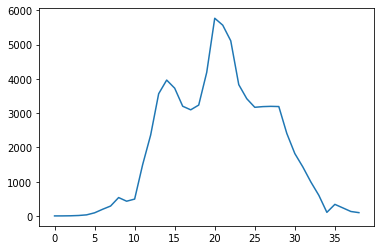

In [8]:
from scipy.signal import argrelextrema
print(argrelextrema(to_plot_2dhist('x','delta_t',background_factor=1,
                          signal_factor=1.6,
                         ).sum(axis=1),
             np.greater))
plt.plot(to_plot_2dhist('x','delta_t',background_factor=1,
                          signal_factor=1.6
                         ).sum(axis=1))
plt.show()

We will use the maxima to draw lines in the plots below.

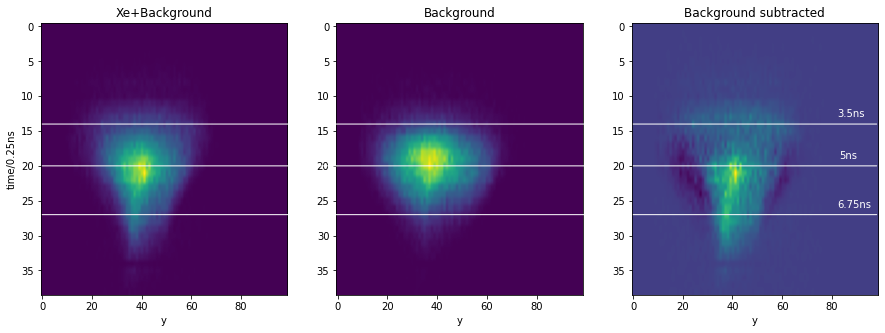

In [54]:


fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)

plt.xlabel('y')
plt.ylabel('time/0.25ns')
plt.title('Xe+Background')


ax2 = fig.add_subplot(132)
plt.xlabel('y')
plt.title('Background')


ax3 = fig.add_subplot(133)
plt.xlabel('y')
plt.title('Background subtracted')



for y in [14, 20, 27]:
    con = ConnectionPatch(xyA=(0,y), xyB=(98,y), coordsA="data", coordsB="data",
                      axesA=ax1, axesB=ax3, color="white")

    ax3.add_artist(con)

im1 = ax1.imshow(to_plot_2dhist('y','delta_t',background_factor=0,
                          signal_factor=1,
                         )
           ,aspect='auto')


im2 = ax2.imshow(to_plot_2dhist('y','delta_t',background_factor=-1,
                          signal_factor=0,
                         )
           ,aspect='auto')




im3=ax3.imshow(to_plot_2dhist('y','delta_t'
                         )
           ,aspect='auto')

plt.text(82,13,'3.5ns',color='white')
plt.text(83,19,'5ns',color='white')
plt.text(82,26,'6.75ns',color='white')


plt.savefig('figures/t-vs-y.pdf')

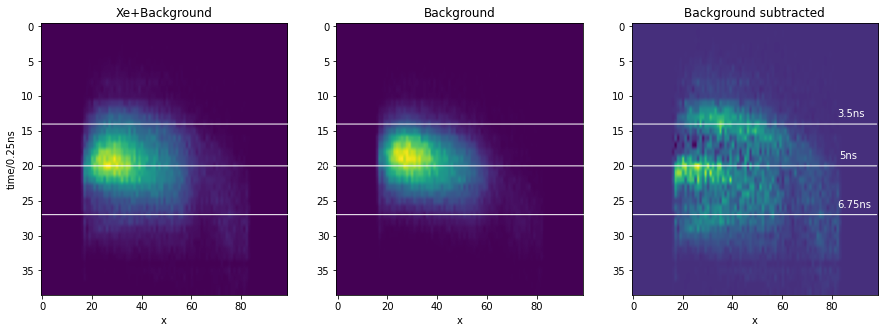

In [10]:


fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)

plt.xlabel('x')
plt.ylabel('time/0.25ns')
plt.title('Xe+Background')


ax2 = fig.add_subplot(132)
plt.xlabel('x')
plt.title('Background')


ax3 = fig.add_subplot(133)
plt.xlabel('x')
plt.title('Background subtracted')

x_maxima = [14, 20, 27]

for y in x_maxima:
    con = ConnectionPatch(xyA=(0,y), xyB=(98,y), coordsA="data", coordsB="data",
                      axesA=ax1, axesB=ax3, color="white")

    ax3.add_artist(con)
    


im1 = ax1.imshow(to_plot_2dhist('x','delta_t',background_factor=0,
                          signal_factor=1,
                         )
           ,aspect='auto')


im2 = ax2.imshow(to_plot_2dhist('x','delta_t',background_factor=-1,
                          signal_factor=0,
                         )
           ,aspect='auto')




im3=ax3.imshow(to_plot_2dhist('x','delta_t',background_factor=1,
                          signal_factor=1.5,
                         )
           ,aspect='auto')



plt.text(82,13,'3.5ns',color='white')
plt.text(83,19,'5ns',color='white')
plt.text(82,26,'6.75ns',color='white')


plt.savefig('figures/t-vs-x.pdf')

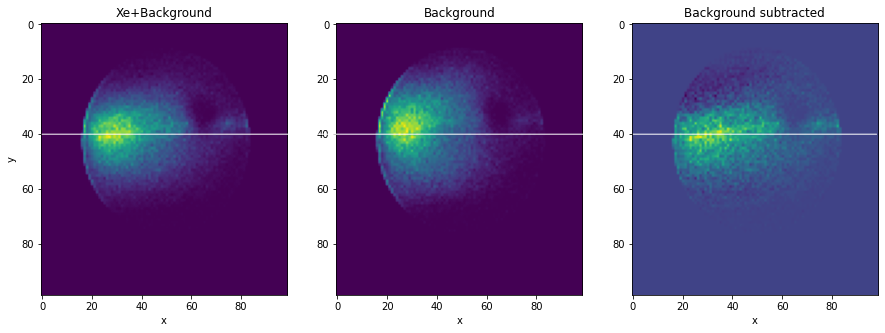

In [11]:


fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Xe+Background')


ax2 = fig.add_subplot(132)
plt.xlabel('x')
plt.title('Background')


ax3 = fig.add_subplot(133)
plt.xlabel('x')
plt.title('Background subtracted')

con = ConnectionPatch(xyA=(0,40), xyB=(98,40), coordsA="data", coordsB="data",
                      axesA=ax1, axesB=ax3, color="white")

ax3.add_artist(con)

im1 = ax1.imshow(to_plot_2dhist('x','y',background_factor=0,
                          signal_factor=1,
                         )
           ,aspect='auto')


im2 = ax2.imshow(to_plot_2dhist('x','y',background_factor=-1,
                          signal_factor=0,
                         )
           ,aspect='auto')




im3=ax3.imshow(to_plot_2dhist('x','y',background_factor=1,
                          signal_factor=1.6,
                         )
           ,aspect='auto')



plt.savefig('figures/x-vs-y.pdf')

interpolate and keep norms constant

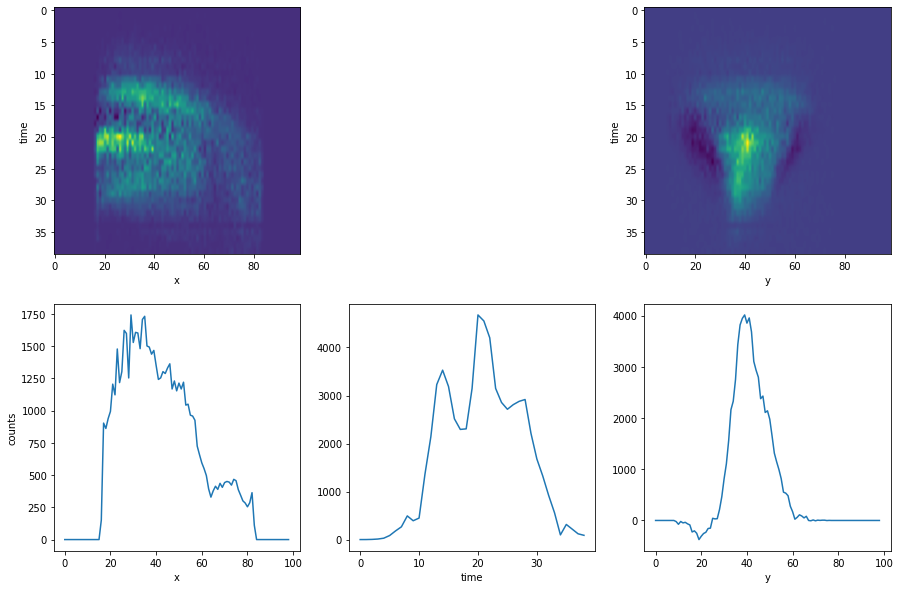

In [13]:
fig = plt.figure(figsize=(15,10))

fig.add_subplot(231)
plt.imshow(to_plot_2dhist('x','delta_t',background_factor=1,
                          signal_factor=1.5,
                         )
           ,aspect='auto')
plt.xlabel('x')
plt.ylabel('time')



fig.add_subplot(233)
plt.imshow(to_plot_2dhist('y','delta_t',background_factor=1,
                          signal_factor=1.5,
                         )
           ,aspect='auto')
plt.xlabel('y')
plt.ylabel('time')

fig.add_subplot(234)
plt.plot(to_plot_2dhist('x','delta_t',background_factor=1,
                          signal_factor=1.5,).sum(axis=0))
plt.xlabel('x')
plt.ylabel('counts')

fig.add_subplot(235)
plt.xlabel('time')
plt.plot(to_plot_2dhist('y','delta_t',background_factor=1,
                          signal_factor=1.5).sum(axis=1))

fig.add_subplot(236)
plt.xlabel('y')
plt.plot(to_plot_2dhist('y','delta_t',background_factor=1,
                          signal_factor=1.5).sum(axis=0))

plt.savefig('figures/integrated-axes.pdf')

plt.show()

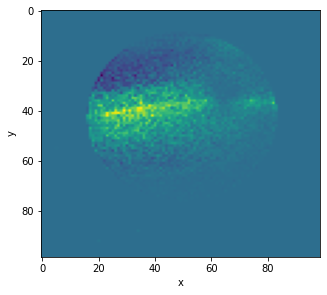

In [151]:
fig = plt.figure(figsize=(5,10))
fig.add_subplot(211)
plt.imshow(to_plot_2dhist('x','y'),aspect='auto')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

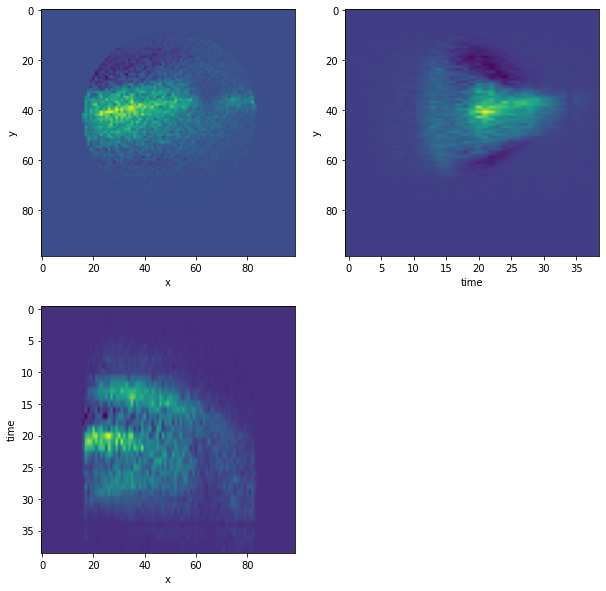

In [55]:

fig = plt.figure(figsize=(10,10))


fig.add_subplot(221)




plt.imshow(to_plot_2dhist('x','y',signal_factor=1.5),aspect='auto')
plt.xlabel('x')
plt.ylabel('y')


fig.add_subplot(223)



plt.imshow(to_plot_2dhist('x','delta_t',signal_factor=1.5),aspect='auto')
plt.xlabel('x')
plt.ylabel('time')


fig.add_subplot(222)


plt.imshow(to_plot_2dhist('delta_t','y',signal_factor=1.5),aspect='auto',)
plt.xlabel('time')
plt.ylabel('y')

plt.savefig('figures/projections.pdf')
plt.show()

# Comparing Center of Mass Centroiding and Max Centroiding

In [3]:
df = pd.read_csv('preprocessed11.csv')   # this is un-centroided data

In [4]:
df.head()

,toa,tot,x,y,tdc1,tdc2,batch
0,0.003464,100,177,44,0.003382,0.003465,0
1,0.003464,175,175,43,0.003382,0.003465,0
2,0.003464,350,179,43,0.003382,0.003465,0
3,0.003464,150,181,40,0.003382,0.003465,0
4,0.003464,525,176,43,0.003382,0.003465,0


In [5]:
batch = df[df['batch']==0]

In [6]:
def max_centroid(batch):
    '''
        Computes centroid of a batch by picking the max intensity pixel
        Args:
            batch : pd.DataFrame-like
                pixel data for which the centorid will be computed
        Returns:
            centroid : np.array
                x,y coordinates of the centroid            
    '''
    tot = np.array(batch.tot)
    xs = np.array(batch.x)
    ys = np.array(batch.y)
    max_ind = tot.argmax()
    x= xs[max_ind]
    y = ys[max_ind]
    return np.array([x,y])

In [7]:
def com_centroid(batch):
    '''
        Computes centroid of a batch by weighing by time over threshold
        and averaging i.e. computing the center of mass
        Args:
            batch : pd.DataFrame-like
                pixel data for which the centorid will be computed
        Returns:
            centroid : np.array
                x,y coordinates of the centroid            
    '''
    tot = np.array(batch.tot)
    xs = np.array(batch.x)
    ys = np.array(batch.y)
    total_tot = tot.sum()
    x = (xs* tot).sum()/total_tot
    y = (ys* tot).sum()/total_tot
    return np.array([x,y])

In [8]:
def plot_centroids(batch_num):
    '''
        Plots both centroids and the pixel data of a batch
        Args:
            batch_num : int or list
                plots the given batch number or all of batch numbers
                in the given list             
    '''
    
    global df  
    def plot_single(batch_num):
        batch = df[df['batch'] ==batch_num]
        plt.scatter(*max_centroid(batch),marker='s',color='red')
        plt.scatter(*com_centroid(batch),marker='s',color='blue')
        sns.scatterplot(data=batch,x='x',y='y',hue='tot')
        print(np.linalg.norm(max_centroid(batch)-com_centroid(batch)))
        plt.show()
        print('-----')
    if type(batch_num)==list:
        for num in batch_num:
            plot_single(num)
    elif type(batch_num) == int:
        plot_single(batch_num)
    


In [9]:
def dist_centroids(batch):
    '''
        Computes the Euclidean distance between max and com
        centroiding methods.
        Args:
            batch : pd.DataFrame-like
                batch for which this computation will be carried out
        Returns:
            distance: float
                Euclidean distance between max and com centroids
    '''
    return np.linalg.norm(max_centroid(batch)-com_centroid(batch))

In [10]:
dist_df=df.groupby('batch').apply(dist_centroids)

In [11]:
dist_df.describe()

count    10000.000000
mean         0.825848
std          0.443154
min          0.000000
25%          0.501959
50%          0.794018
75%          1.105325
max          6.822784
dtype: float64

In [186]:
%timeit df.groupby('batch').apply(max_centroid)

4.12 s ± 156 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [205]:
%timeit df.groupby('batch').apply(max_centroid_np) # everything is computed in np

1.55 s ± 34.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [187]:
%timeit df.groupby('batch').apply(com_centroid)   # compute total_tot twice

6.73 s ± 257 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [193]:
%timeit df.groupby('batch').apply(com_centroid)   # compute total_tot once & no conversion to np

6.65 s ± 278 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [199]:
%timeit df.groupby('batch').apply(com_centroid_np)   # compute total_tot once & all np

2 s ± 349 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Woow!!! Numpy is much faster! According to interwebs this is because pandas is doing a lot of things with its indeces and all of these operations are performed in Python. Whereas numpy is going to Cython or C directly.
See [this blog post](https://penandpants.com/2014/09/05/performance-of-pandas-series-vs-numpy-arrays/)

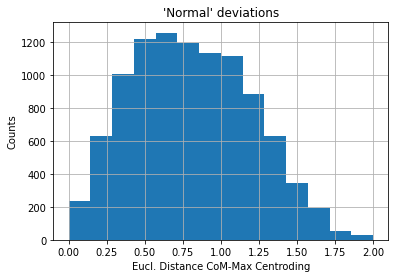

In [13]:
dist_df.hist(bins=np.linspace(0,2,15))
plt.xlabel('Eucl. Distance CoM-Max Centroding')
plt.ylabel('Counts')
plt.title("'Normal' deviations")
plt.savefig('figures/com-max.pdf')
plt.show()

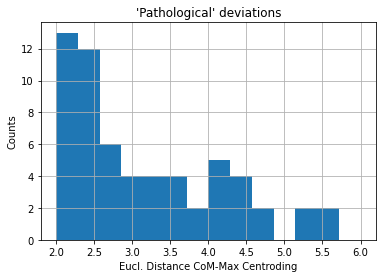

In [26]:
dist_df[dist_df>2].hist(bins=np.linspace(2,6,15))
plt.xlabel('Eucl. Distance CoM-Max Centroding')
plt.ylabel('Counts')
plt.title("'Pathological' deviations")
plt.savefig('figures/com-max-pathological.pdf')
plt.show()

In [30]:
len(dist_df[dist_df>2])

62

In [32]:
max_dist_list = list(dist_df.sort_values(ascending=False).index[60:100])

In [14]:
pathological_list= list(dist_df.sort_values(ascending=False).index[:40])

In [ ]:
plot_centroids(max_dist_list)    # removed so that file is smaller

In [ ]:
plot_centroids(pathological_list)   # removed so that file is smaller

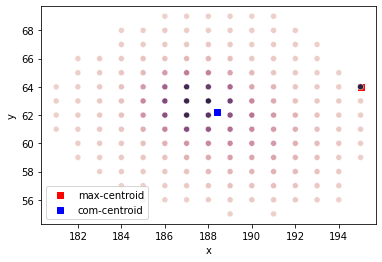

In [21]:
batch_num = pathological_list[0]
batch = df[df['batch'] ==batch_num]
plt.scatter(*max_centroid(batch),marker='s',color='red',label='max-centroid')
plt.scatter(*com_centroid(batch),marker='s',color='blue',label='com-centroid')
sns.scatterplot(data=batch,x='x',y='y',hue='tot',legend=False)
plt.legend()
plt.savefig('figures/com-max-wrong-max.pdf')
plt.show()
del batch,batch_num

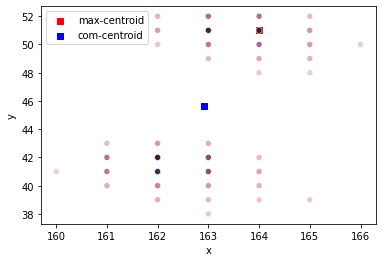

In [22]:
batch_num = pathological_list[2]
batch = df[df['batch'] ==batch_num]
plt.scatter(*max_centroid(batch),marker='s',color='red',label='max-centroid')
plt.scatter(*com_centroid(batch),marker='s',color='blue',label='com-centroid')
sns.scatterplot(data=batch,x='x',y='y',hue='tot',legend=False)
plt.legend()
plt.savefig('figures/com-max-many-electron.pdf')
plt.show()
del batch,batch_num

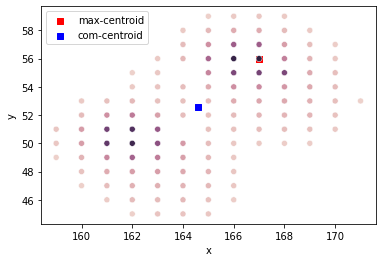

In [36]:
batch_num = pathological_list[13]
batch = df[df['batch'] ==batch_num]
plt.scatter(*max_centroid(batch),marker='s',color='red',label='max-centroid')
plt.scatter(*com_centroid(batch),marker='s',color='blue',label='com-centroid')
sns.scatterplot(data=batch,x='x',y='y',hue='tot',legend=False)
plt.legend()
plt.savefig('figures/com-max-many-electron-overlapping.pdf')
plt.show()
del batch,batch_num

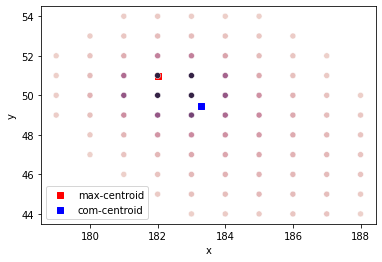

In [37]:
batch_num = max_dist_list[2]
batch = df[df['batch'] ==batch_num]
plt.scatter(*max_centroid(batch),marker='s',color='red',label='max-centroid')
plt.scatter(*com_centroid(batch),marker='s',color='blue',label='com-centroid')
sns.scatterplot(data=batch,x='x',y='y',hue='tot',legend=False)
plt.legend()
plt.savefig('figures/com-max-legit-confusion.pdf')
plt.show()
del batch,batch_num

# New Measurements 

In [34]:
signal = pd.read_csv('45deg_11_centroid.csv',index_col=False)
signal.delta_t = signal.delta_t*1e9 #convert s to ns

<AxesSubplot:>

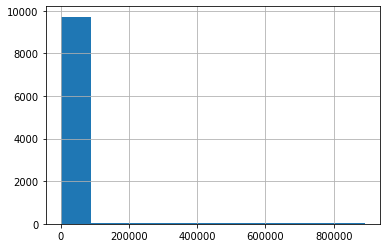

In [35]:
signal.delta_t.hist()

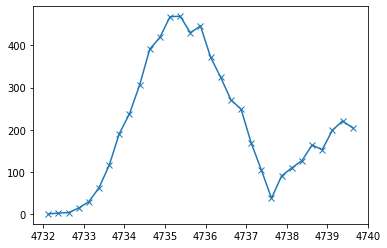

(array([4732.125, 4732.375, 4732.625, 4732.875, 4733.125, 4733.375,
        4733.625, 4733.875, 4734.125, 4734.375, 4734.625, 4734.875,
        4735.125, 4735.375, 4735.625, 4735.875, 4736.125, 4736.375,
        4736.625, 4736.875, 4737.125, 4737.375, 4737.625, 4737.875,
        4738.125, 4738.375, 4738.625, 4738.875, 4739.125, 4739.375,
        4739.625]),
 array([  1,   3,   4,  15,  30,  63, 116, 191, 238, 306, 391, 419, 468,
        469, 430, 446, 372, 324, 271, 249, 169, 105,  38,  91, 110, 127,
        164, 153, 199, 221, 205]))

In [40]:
line_hist(signal.delta_t,normalized=False,bins=np.linspace(4_732,4_740,32,endpoint=False))

In [31]:
np.linspace(4_732,4_740,32,endpoint=False)

array([4732.  , 4732.25, 4732.5 , 4732.75, 4733.  , 4733.25, 4733.5 ,
       4733.75, 4734.  , 4734.25, 4734.5 , 4734.75, 4735.  , 4735.25,
       4735.5 , 4735.75, 4736.  , 4736.25, 4736.5 , 4736.75, 4737.  ,
       4737.25, 4737.5 , 4737.75, 4738.  , 4738.25, 4738.5 , 4738.75,
       4739.  , 4739.25, 4739.5 , 4739.75])

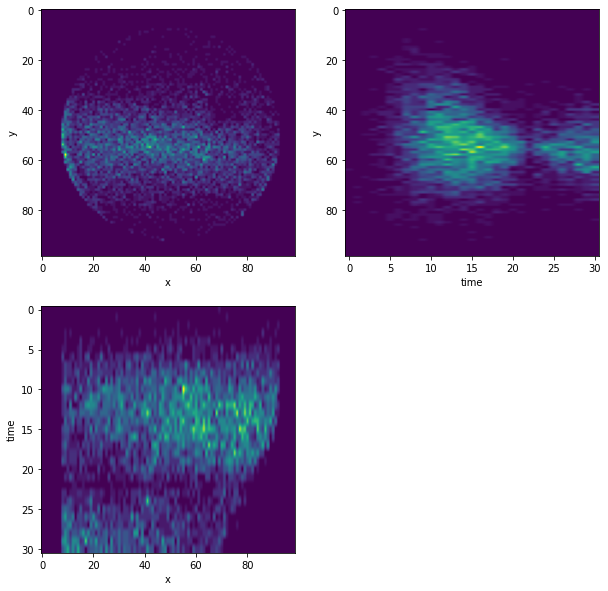

In [36]:

fig = plt.figure(figsize=(10,10))


fig.add_subplot(221)




plt.imshow(to_plot_2dhist('x','y',no_background=True,signal_df=signal),aspect='auto')
plt.xlabel('x')
plt.ylabel('y')


fig.add_subplot(223)



plt.imshow(to_plot_2dhist('x','delta_t',no_background=True,
                          bin2=np.linspace(4_732,4_740,32,endpoint=False),
                         signal_df=signal),aspect='auto')
plt.xlabel('x')
plt.ylabel('time')


fig.add_subplot(222)


plt.imshow(to_plot_2dhist('delta_t','y',no_background=True,signal_df=signal,
                         bin1=np.linspace(4_732,4_740,32,endpoint=False)),aspect='auto',)
plt.xlabel('time')
plt.ylabel('y')
#plt.savefig('figures/ati_horiz_projections.pdf')
plt.show()

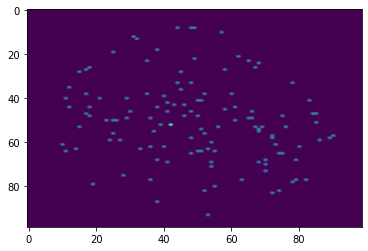

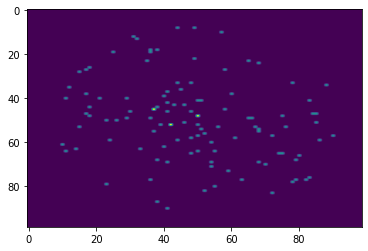

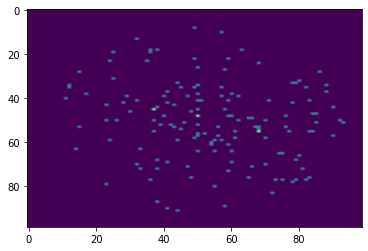

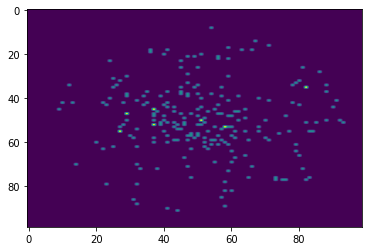

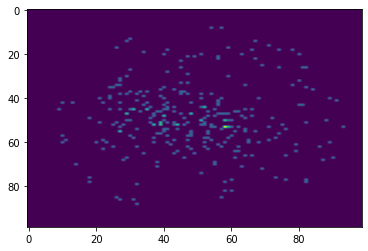

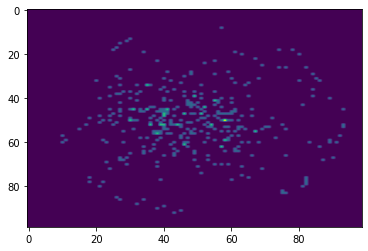

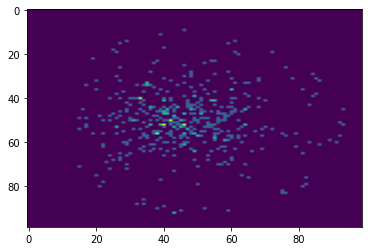

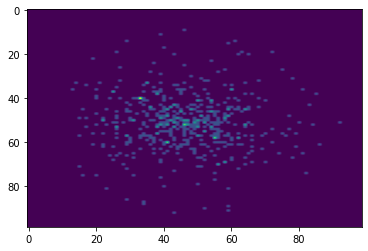

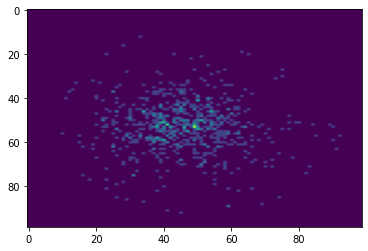

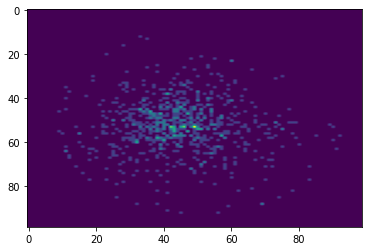

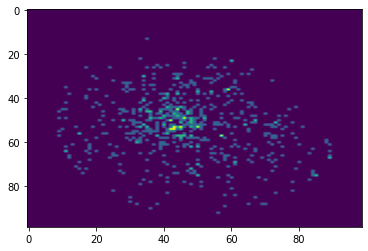

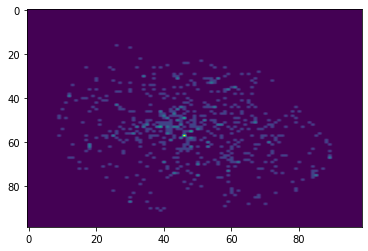

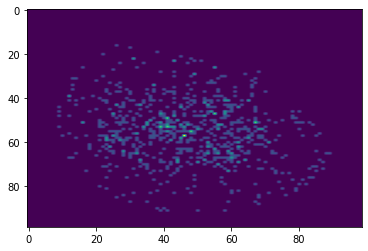

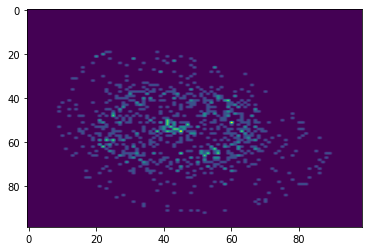

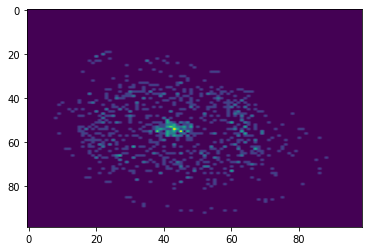

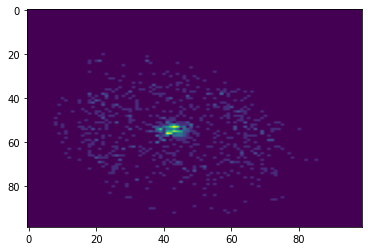

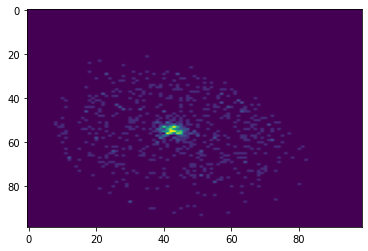

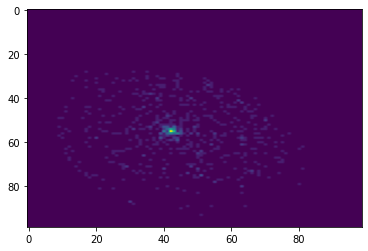

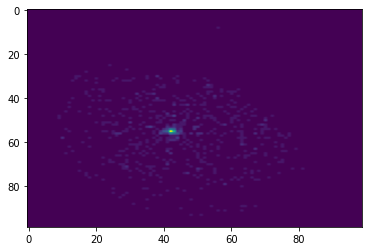

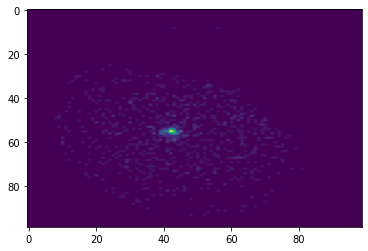

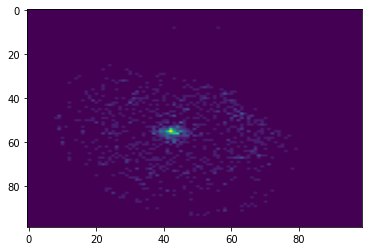

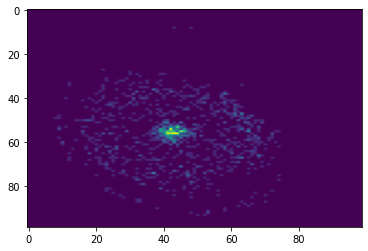

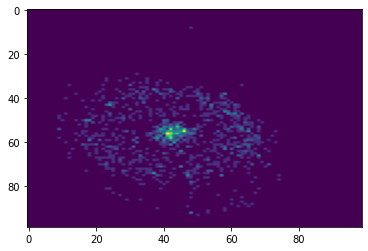

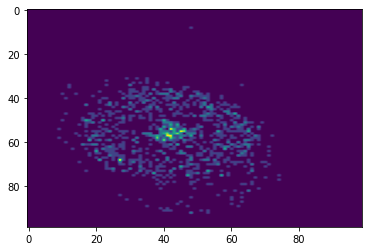

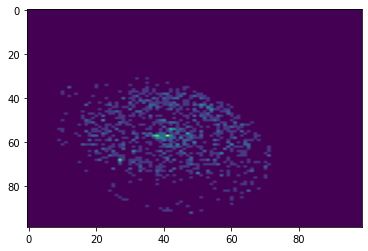

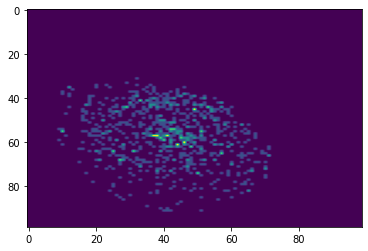

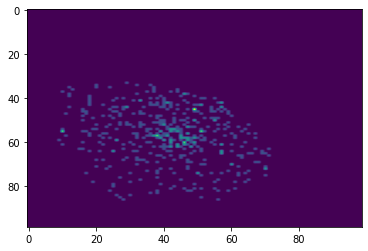

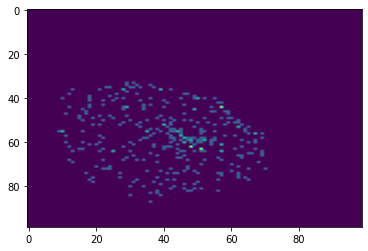

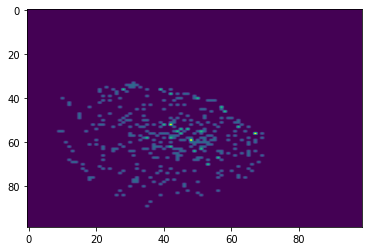

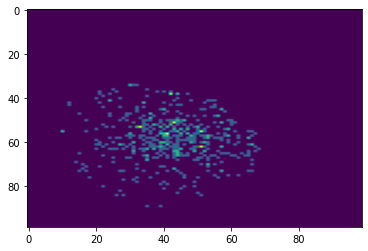

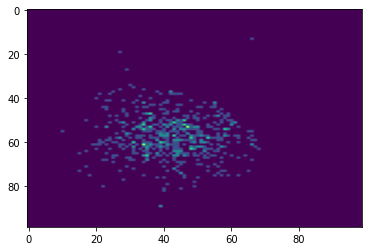

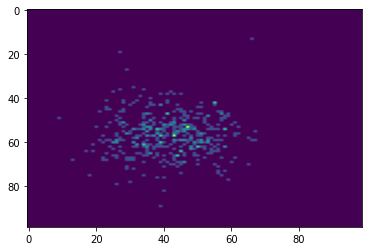

In [161]:
for t_low in np.linspace(4732,4740,32,endpoint=False):
    t_high = t_low+0.3
    tmp=signal[(signal.delta_t > t_low-0.3) &(signal.delta_t<t_high)]
    plt.imshow(to_plot_2dhist('x','y',no_background=True,signal_df=tmp),aspect='auto')
    plt.show()

In [158]:
tmp = signal[(signal.delta_t > 4732) &(signal.delta_t<4734)]

In [ ]:
1. histogram of slices

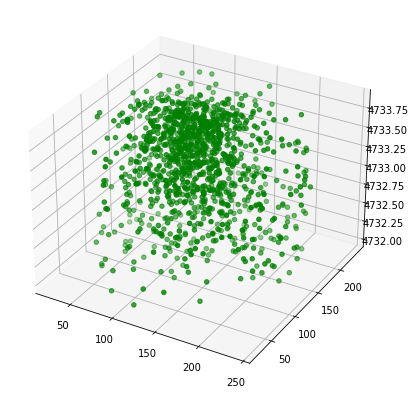

In [159]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(tmp.x, tmp.y, tmp.delta_t, color = "green")
plt.show()